Decision Tree using pruning

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
df["gender"] =df["gender"].map({"Female":0,"Male":1})

In [8]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [9]:
df["smoking_history"] = df["smoking_history"].map({"never":0,"No Info":1,"current":2,"former":3,"ever":4,"not current":5})

In [10]:
df.diabetes.value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [11]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0,25.19,6.6,140,0
1,0.0,54.0,0,0,1,27.32,6.6,80,0
2,1.0,28.0,0,0,0,27.32,5.7,158,0
3,0.0,36.0,0,0,2,23.45,5.0,155,0
4,1.0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0.0,36.0,0,0,1,24.60,4.8,145,0
99996,0.0,2.0,0,0,1,17.37,6.5,100,0
99997,1.0,66.0,0,0,3,27.83,5.7,155,0
99998,0.0,24.0,0,0,0,35.42,4.0,100,0


In [12]:
x= df.drop("diabetes",axis=1)
y= df["diabetes"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
y_train

10481    0
16754    0
60187    0
68737    0
62328    0
        ..
64703    1
38178    0
60920    0
2843     0
6483     0
Name: diabetes, Length: 76916, dtype: int64

In [16]:
y_test

66207    0
90718    0
80438    0
23473    0
75505    0
        ..
86912    0
34918    0
24014    0
82156    0
77200    0
Name: diabetes, Length: 19230, dtype: int64

In [17]:
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
10481,0.0,35.0,0,0,3,20.25,5.8,140
16754,1.0,51.0,0,0,1,27.32,5.8,90
60187,0.0,77.0,0,0,5,26.22,6.5,126
68737,0.0,42.0,0,0,2,24.05,5.8,145
62328,0.0,56.0,0,0,4,24.94,5.0,159
...,...,...,...,...,...,...,...,...
64703,0.0,54.0,0,0,2,37.83,9.0,140
38178,1.0,78.0,0,0,2,27.32,5.7,200
60920,1.0,19.0,0,0,0,20.54,4.0,85
2843,0.0,47.0,0,0,0,26.56,6.0,80


In [18]:
x_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
66207,1.0,35.0,0,0,0,27.32,6.6,200
90718,1.0,3.0,0,0,1,18.36,5.7,158
80438,0.0,25.0,0,0,0,23.99,6.2,145
23473,1.0,12.0,0,0,1,20.90,6.2,90
75505,0.0,70.0,0,0,0,27.28,6.1,159
...,...,...,...,...,...,...,...,...
86912,1.0,10.0,0,0,1,18.18,5.8,158
34918,1.0,36.0,0,0,0,34.53,6.0,90
24014,0.0,75.0,0,0,0,27.32,6.1,158
82156,0.0,60.0,0,0,1,24.97,6.2,85


#Prepruning

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy",max_depth=8)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [52]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9444444444444444, 'x[6] <= 6.7\nentropy = 0.433\nsamples = 76916\nvalue = [70068, 6848]'),
 Text(0.46875, 0.8333333333333334, 'x[7] <= 210.0\nentropy = 0.287\nsamples = 73761\nvalue = [70068, 3693]'),
 Text(0.484375, 0.8888888888888888, 'True  '),
 Text(0.4375, 0.7222222222222222, 'x[6] <= 5.35\nentropy = 0.201\nsamples = 72340\nvalue = [70068.0, 2272.0]'),
 Text(0.40625, 0.6111111111111112, 'entropy = 0.0\nsamples = 28927\nvalue = [28927, 0]'),
 Text(0.46875, 0.6111111111111112, 'x[1] <= 42.5\nentropy = 0.296\nsamples = 43413\nvalue = [41141, 2272]'),
 Text(0.21875, 0.5, 'x[5] <= 30.675\nentropy = 0.092\nsamples = 22061\nvalue = [21804, 257]'),
 Text(0.09375, 0.3888888888888889, 'x[7] <= 113.0\nentropy = 0.056\nsamples = 18617\nvalue = [18497, 120]'),
 Text(0.0625, 0.2777777777777778, 'entropy = 0.0\nsamples = 5753\nvalue = [5753, 0]'),
 Text(0.125, 0.2777777777777778, 'x[1] <= 11.5\nentropy = 0.076\nsamples = 12864\nvalue = [12744.0, 120.0]'),
 Text(0.0625, 0.16666666666

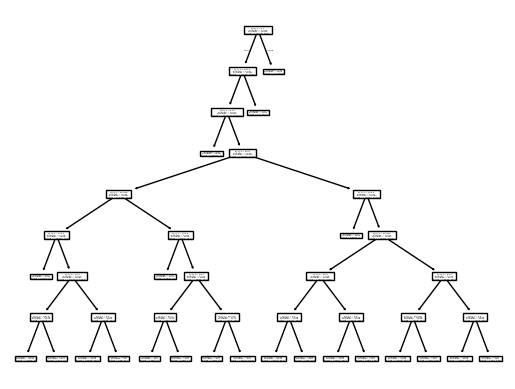

In [53]:
plot_tree(dt)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [55]:
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9719708788351534

In [56]:
confusion_matrix(y_test,y_pred)

array([[17596,     0],
       [  539,  1095]])

[Text(0.5, 0.9444444444444444, 'x[6] <= 6.7\nentropy = 0.433\nsamples = 76916\nvalue = [70068, 6848]'),
 Text(0.46875, 0.8333333333333334, 'x[7] <= 210.0\nentropy = 0.287\nsamples = 73761\nvalue = [70068, 3693]'),
 Text(0.484375, 0.8888888888888888, 'True  '),
 Text(0.4375, 0.7222222222222222, 'x[6] <= 5.35\nentropy = 0.201\nsamples = 72340\nvalue = [70068.0, 2272.0]'),
 Text(0.40625, 0.6111111111111112, 'entropy = 0.0\nsamples = 28927\nvalue = [28927, 0]'),
 Text(0.46875, 0.6111111111111112, 'x[1] <= 42.5\nentropy = 0.296\nsamples = 43413\nvalue = [41141, 2272]'),
 Text(0.21875, 0.5, 'x[5] <= 30.675\nentropy = 0.092\nsamples = 22061\nvalue = [21804, 257]'),
 Text(0.09375, 0.3888888888888889, 'x[7] <= 113.0\nentropy = 0.056\nsamples = 18617\nvalue = [18497, 120]'),
 Text(0.0625, 0.2777777777777778, 'entropy = 0.0\nsamples = 5753\nvalue = [5753, 0]'),
 Text(0.125, 0.2777777777777778, 'x[1] <= 11.5\nentropy = 0.076\nsamples = 12864\nvalue = [12744.0, 120.0]'),
 Text(0.0625, 0.16666666666

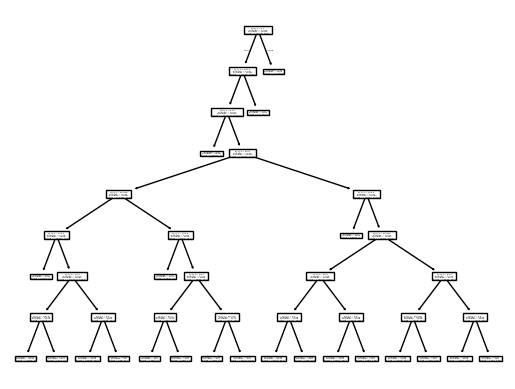

In [57]:
plot_tree(dt)

Hyper Parameter fine pruning

In [58]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier()

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {"criterion":["gini","entropy"],"max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [61]:
gs = GridSearchCV(de,param_grid=params,scoring="accuracy")

In [62]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15]},
             scoring='accuracy')

In [63]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [64]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier(criterion="gini",max_depth=2)
de.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [65]:
y_pred = de.predict(x_test)
accuracy_score(y_test,y_pred)

0.9719708788351534

[Text(0.6, 0.8333333333333334, 'x[6] <= 6.7\ngini = 0.162\nsamples = 76916\nvalue = [70068, 6848]'),
 Text(0.4, 0.5, 'x[7] <= 210.0\ngini = 0.095\nsamples = 73761\nvalue = [70068, 3693]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.061\nsamples = 72340\nvalue = [70068.0, 2272.0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1421\nvalue = [0, 1421]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3155\nvalue = [0, 3155]'),
 Text(0.7, 0.6666666666666667, '  False')]

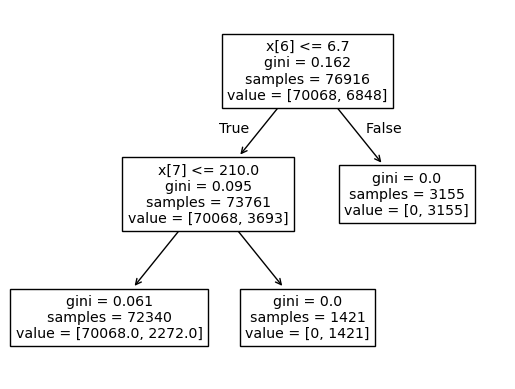

In [66]:
plot_tree(de)

Post Pruning

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9481539261570463

[Text(0.5331775744428671, 0.9864864864864865, 'x[6] <= 6.7\ngini = 0.16\nsamples = 76916\nvalue = [70169, 6747]'),
 Text(0.5328351709845922, 0.9594594594594594, 'x[7] <= 210.0\ngini = 0.094\nsamples = 73805\nvalue = [70169, 3636]'),
 Text(0.5330063727137296, 0.972972972972973, 'True  '),
 Text(0.5324927675263172, 0.9324324324324325, 'x[1] <= 54.5\ngini = 0.06\nsamples = 72394\nvalue = [70169, 2225]'),
 Text(0.26287168011383244, 0.9054054054054054, 'x[2] <= 0.5\ngini = 0.026\nsamples = 50924\nvalue = [50256, 668]'),
 Text(0.18493187740668837, 0.8783783783783784, 'x[5] <= 32.465\ngini = 0.022\nsamples = 49374\nvalue = [48833, 541]'),
 Text(0.11338804209422515, 0.8513513513513513, 'x[1] <= 42.5\ngini = 0.014\nsamples = 42591\nvalue = [42292, 299]'),
 Text(0.04488419473661684, 0.8243243243243243, 'x[6] <= 5.35\ngini = 0.007\nsamples = 32855\nvalue = [32735, 120]'),
 Text(0.04454179127834191, 0.7972972972972973, 'gini = 0.0\nsamples = 13584\nvalue = [13584, 0]'),
 Text(0.04522659819489177, 

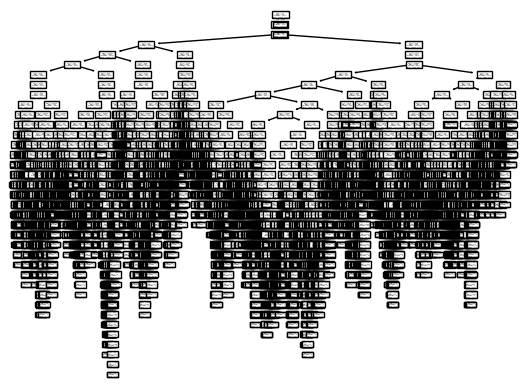

In [26]:
plot_tree(dt)